In [1]:
"""Using matplotlib effectively."""

'Using matplotlib effectively.'

# Эффективное использование Matplotlib

# Введение

Мир визуализации *Python* может разочаровать нового пользователя. Есть много разных вариантов, и выбрать подходящий - непростая задача.

В этой статье будет показано, как я использую *matplotlib*, и предоставлены некоторые рекомендации для начинающих пользователей. Я твердо верю, что *matplotlib* является неотъемлемой частью стека науки о данных *Python*, и надеюсь, что эта статья поможет людям понять, как использовать его для собственных визуализаций.

> Оригинал статьи Криса [тут](https://pbpython.com/effective-matplotlib.html)

## Откуда негатив по отношению к matplotlib?

На мой взгляд, есть несколько причин, по которым сложно изучить *matplotlib*.

Во-первых, у *matplotlib* два интерфейса. Первый основан на *MATLAB* и использует интерфейс на основе состояний. Второй вариант - это *объектно-ориентированный интерфейс*. Причины этого выходят за рамки публикации, но знание того, что есть два подхода, жизненно важно при построении графика с помощью *matplotlib*.

Причина, по которой два интерфейса вызывают путаницу, заключается в том, что в мире *stack overflow* и информации, доступной через гугл, новые пользователи находят несколько похожих решений.

Могу сказать из собственного опыта: оглядываясь назад на часть моего старого кода, существует мешанина из кода *matplotlib*, которая сбивает с толку (даже если я сам ее написал).

> Новые пользователи *matplotlib* должны изучить и использовать объектно-ориентированный интерфейс.

Еще одна историческая проблема с *matplotlib* заключается в том, что некоторые стили по умолчанию были довольно непривлекательными. В мире, где *R* мог генерировать несколько действительно крутых графиков с помощью *ggplot*, параметры *matplotlib* выглядели бледно. Хорошая новость заключается в том, что *matplotlib 3.3* имеет гораздо более [приятные возможности](https://matplotlib.org/gallery/index.html).

Третья проблема, которую я вижу, заключается в том, что существует путаница относительно того, когда вы должны использовать чистый *matplotlib*, по сравнению с такими инструментами, как *pandas* или *seaborn*, которые построены поверх *matplotlib*.

## Зачем использовать matplotlib?

Несмотря на некоторые из этих проблем *matplotlib* чрезвычайно мощный инструмент. Библиотека позволяет создавать практически любую визуализацию, которую вы только можете себе представить. Кроме того, вокруг нее построена обширная экосистема инструментов *Python*, и многие из более продвинутых инструментов визуализации используют *matplotlib* в качестве базовой библиотеки. Если вы работаете в стеке науки о данных *Python*, вам необходимо получить базовые знания о том, как использовать *matplotlib*.

## Основные предпосылки

Рекомендую следующие шаги для изучения того, как использовать *matplotlib*:

1. Изучите основную терминологию *matplotlib*, в частности, что такое `Figure` (фигура) и `Axes` (оси).
2. Всегда используйте объектно-ориентированный интерфейс. Возьмите за привычку использовать его с самого начала анализа.
3. Начните свои визуализации с простых графиков (*plotting*) в *pandas*.
4. Используйте *seaborn* для более сложных статистических визуализаций.
5. Используйте *matplotlib* для настройки визуализации *pandas* или *seaborn*.

Следующий рисунок из [часто задаваемых вопросов о *matplotlib*](https://matplotlib.org/faq/usage_faq.html) - золотой. Держите его под рукой, чтобы понимать  терминологию графика (*plot*).

![](https://github.com/dm-fedorov/pandas_basic/blob/master/pic/matplotlib-anatomy.png?raw=True)

Большинство терминов просты, но главное помнить, что `Figure` - это окончательное изображение, которое может содержать `1` или более *осей* (*axes*).

`Axes` (оси) представляют собой отдельный график (*plot*). Как только вы поймете, что это такое и как получить к ним доступ через *объектно-ориентированный API*, остальная часть процесса станет на свои места.

Другое преимущество этих знаний состоит в том, что у вас есть отправная точка, когда вы встречаете код в сети.

Наконец, я не говорю, что вам следует избегать других хороших вариантов, таких как `ggplot` (aka `ggpy`), `bokeh`, `plotly` или `altair`. Я просто думаю, что для начала вам понадобится базовое понимание `matplotlib + pandas + seaborn`. Поняв базовый стек визуализации, вы сможете изучить другие варианты и сделать осознанный выбор в зависимости от ваших потребностей.

## Начнем

Остальная часть этого поста является руководством по созданию базовой визуализации в *pandas* и настройке наиболее распространенных элементов с помощью *matplotlib*.

Я сосредоточился на наиболее распространенных задачах построения графиков, с которыми я сталкиваюсь, таких как маркировка осей (*labeling axes*), настройка пределов (*limits*), обновление заголовков графиков (*plot titles*), сохранение фигур (*figures*) и корректировка легенд (*legends*).

Для начала я собираюсь настроить импорт и прочитать данные о продажах:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [3]:
df = pd.read_excel(
    "https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true"
)
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


Данные состоят из транзакций продаж за `2014` год.

Чтобы сделать этот пост немного короче, я собираюсь обобщить данные, чтобы мы могли увидеть общее количество покупок и общие продажи для `10` крупнейших клиентов.

Я также собираюсь переименовать столбцы для наглядности при построении графиков.

In [4]:
top_10 = (
    df.groupby("name")[["ext price", "quantity"]]
    .agg({"ext price": "sum", "quantity": "count"})
    .sort_values(by="ext price", ascending=False)
)[:10].reset_index()

In [5]:
top_10.rename(
    columns={"name": "Name", "ext price": "Sales", "quantity": "Purchases"},
    inplace=True,
)

Вот как выглядят данные:

In [6]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


Теперь, когда данные отформатированы в виде простой таблицы, давайте поговорим о представлении этих результатов в виде гистограммы (*bar chart*).

Как я упоминал ранее, у *matplotlib* есть много разных стилей, доступных для отображения графиков (*plots*). Вы можете увидеть, какие из них доступны в вашей системе, используя `plt.style.available`:

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Использовать стиль просто:

In [8]:
plt.style.use("ggplot")

Призываю вас поиграть с разными стилями и посмотреть, какие из них вам понравятся.

Теперь, когда у нас есть более красивый стиль, первым делом нужно построить график данных с помощью стандартной функции построения (*plotting*) в *pandas*:

<Axes: ylabel='Name'>

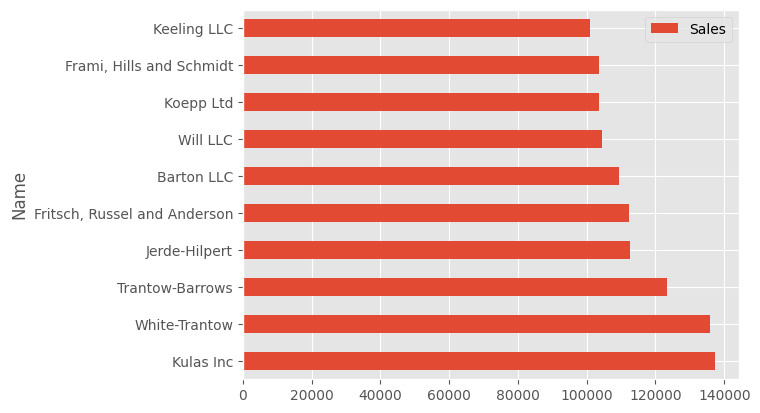

In [9]:
top_10.plot(kind="barh", y="Sales", x="Name")

Причина, по которой я рекомендую в первую очередь использовать построение (*plotting*) в *pandas*, заключается в том, что это быстрый и простой способ прототипирования визуализации.

## Настройка графика

Предполагая, что вы понимаете суть графика, следующим шагом будет его настройка.

Некоторые настройки (например, добавление заголовков и меток) очень просты в функции *plot*. Однако в какой-то момент вам, вероятно, придется выйти за рамки этой функциональности.

Вот почему я рекомендую выработать привычку делать следующее:

<Axes: ylabel='Name'>

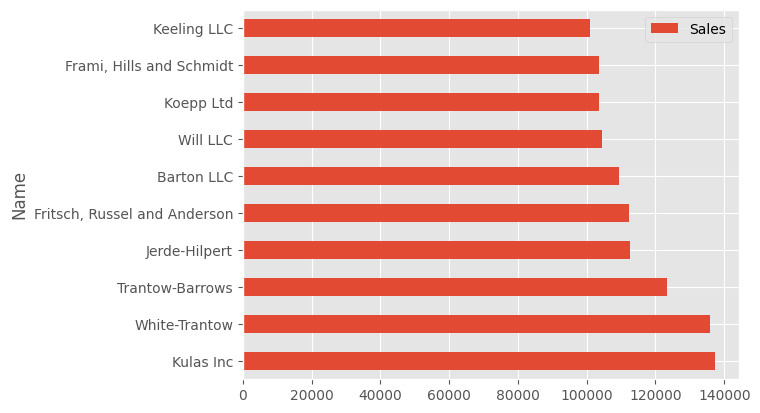

In [10]:
fig, ax = plt.subplots()
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax)

Результирующий график выглядит точно так же, как и оригинальный, но мы добавили дополнительный вызов `plt.subplots()` и передали `ax` функции построения графика.

Зачем это делать? Помните, я сказал, что очень важно получить доступ к *осям* (*axes*) и *фигурам* (*figures*) в *matplotlib*? Вот чего мы здесь добились. Любая дальнейшая настройка будет выполняться с помощью объектов `ax` или `fig`.

Теперь у нас есть преимущества графиков *pandas* и доступ ко всей мощи *matplotlib*.

Предположим, мы хотим настроить пределы `x` и изменить метки некоторых осей? Теперь, когда у нас есть оси в переменной `ax`, появилось множество возможностей для управления:

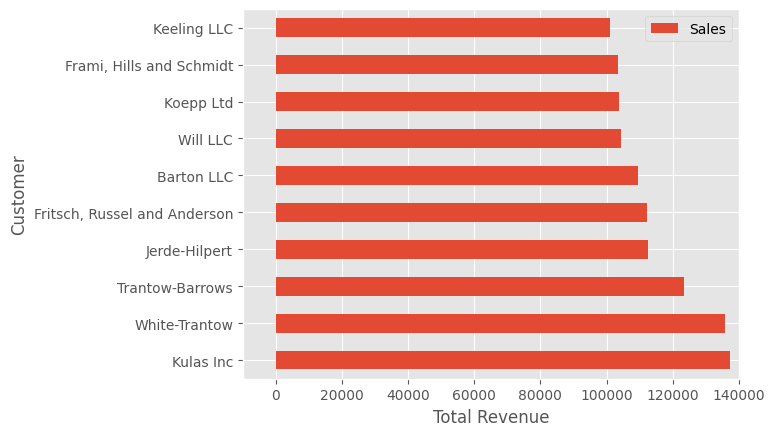

In [11]:
fig, ax = plt.subplots()
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel("Total Revenue")
ax.set_ylabel("Customer");

Вот еще один прием, который мы можем использовать для изменения заголовка и обеих меток:

[Text(0.5, 1.0, '2014 Revenue'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0, 0.5, 'Customer')]

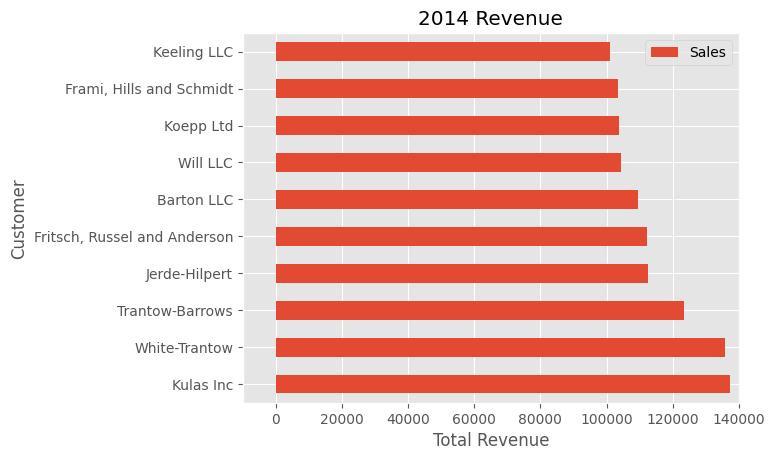

In [12]:
fig, ax = plt.subplots()
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title="2014 Revenue", xlabel="Total Revenue", ylabel="Customer")

Далее можем настроить размер изображения.

Используя функцию `plt.subplots()`, можем определить `figsize` (размер файла) в дюймах, а также удалить легенду с помощью `ax.legend().set_visible(False)`:

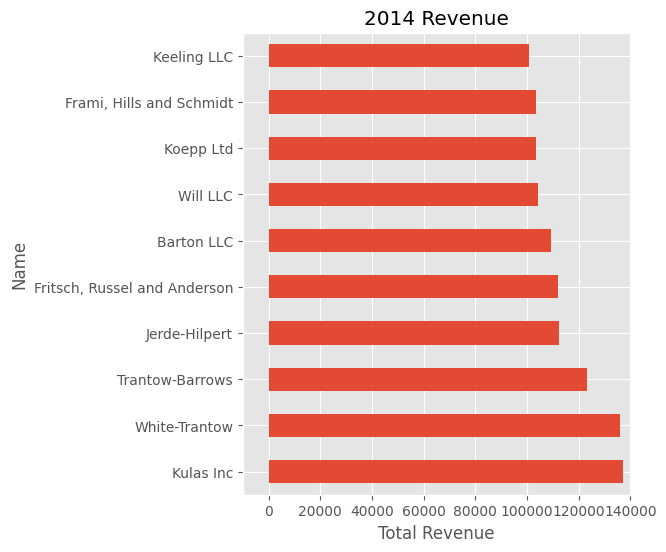

In [13]:
fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title="2014 Revenue", xlabel="Total Revenue")
ax.legend().set_visible(False)

Есть много вещей, которые вы, вероятно, захотите сделать, чтобы очистить этот график. Одна из самых больших неприятностей - это форматирование чисел в `Total Revenue` (общего дохода).

*Matplotlib* может помочь нам в этом с помощью `FuncFormatter`. Эта универсальная функция позволяет применять пользовательскую функцию к значению и возвращать красиво отформатированную строку для размещения на оси.

Вот функция форматирования валюты для корректной обработки долларов США в диапазоне нескольких сотен тысяч:

In [14]:
def currency(x_var: float, pos: int) -> str:
    """Форматирование числа в валютный вид для графиков.

    Аргументы:
        x_var: Значение, которое нужно отформатировать.
        pos: Позиция отметки (не используется, требуется для matplotlib FuncFormatter).

    Возвращает:
        Строку с отформатированным значением в виде $XK или $XM.
    """
    # pylint: disable=unused-argument
    if x_var >= 1_000_000:
        return f"${x_var * 1e-6:1.1f}M"
    return f"${x_var * 1e-3:1.0f}K"

Теперь, когда у нас есть функция форматирования, нужно определить ее и применить к оси `x`.

Вот полный код:

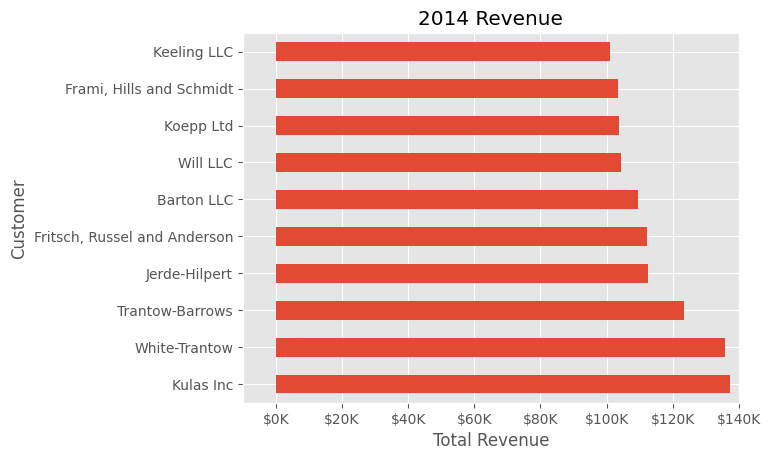

In [15]:
fig, ax = plt.subplots()
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title="2014 Revenue", xlabel="Total Revenue", ylabel="Customer")
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

Это намного приятнее и демонстрирует хороший пример гибкости, позволяющей найти собственное решение проблемы.

Последняя функция настройки, которую я рассмотрю, - это возможность добавлять *аннотации* к графику. Чтобы нарисовать вертикальную линию, можно использовать `ax.axvline()`, а для добавления собственного текста - `ax.text()`.

В этом примере мы нарисуем линию, показывающую среднее значение, и добавим метки, показывающие трех новых клиентов.

Вот полный код с комментариями, чтобы собрать все воедино:

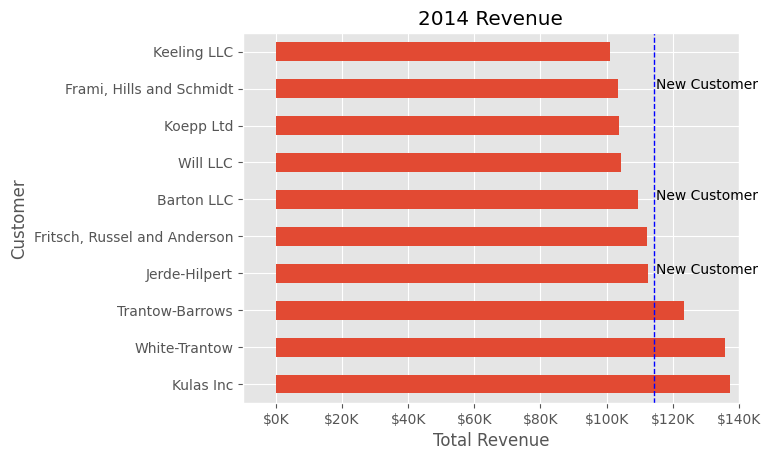

In [16]:
# Создаем новую фигуру и оси
fig, ax = plt.subplots()

# График данных и усредненное значение
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax)
avg = top_10["Sales"].mean()

# Устанавливаем ограничения и метки
ax.set_xlim([-10000, 140000])
ax.set(title="2014 Revenue", xlabel="Total Revenue", ylabel="Customer")

# Добавляем линию для среднего
ax.axvline(x=avg, color="b", label="Average", linestyle="--", linewidth=1)

# Указываем новых покупателей
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")

# Формат валюты
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Скрываем легенду
ax.legend().set_visible(False)

Хотя это не самый захватывающий график, он все же показывает, сколько у вас возможностей.

## Фигуры и графики (Figures and Plots)

До сих пор все изменения, которые мы вносили, касались отдельного графика. К счастью, у нас есть возможность добавить несколько графиков к фигуре, а также сохранить фигуру целиком, используя различные параметры.

Если мы хотим нанести два графика на одну и ту же фигуру, то должно быть понимание того, как это сделать.

Сначала создайте фигуру, потом оси, а затем нанесите все вместе.

Можем сделать это с помощью `plt.subplots()`:

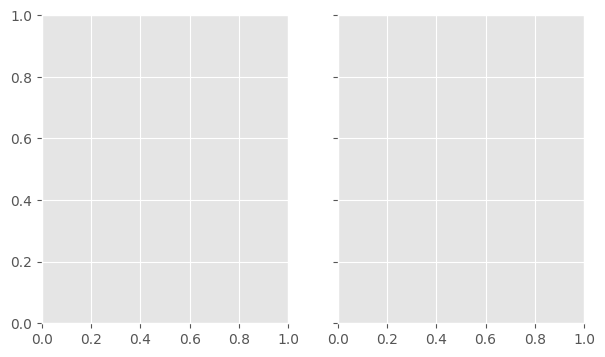

In [17]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))

В этом примере я использую `nrows` и `ncols`, чтобы указать размер, потому что это понятно новому пользователю.

В коде вы часто будете встречать значения, типа `1,2`. Я думаю, что использование именованных параметров будет легче интерпретировать позже, когда вы вернетесь к своему коду.

Я также использую `sharey=True`, чтобы оси `y` использовали одни и те же метки.

Этот пример довольно изящный, потому что различные оси распаковываются в `ax0` и `ax1`.

Теперь, когда у нас есть эти оси, вы можете построить их, как в приведенных выше примерах, но поместите один график на `ax0`, а другой на `ax1`.

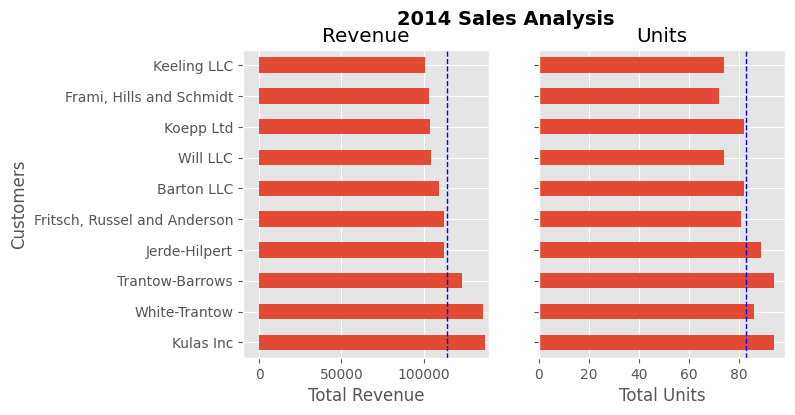

In [18]:
# Получаем фигуру и оси
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax0)

ax0.set_xlim([-10000, 140000])
ax0.set(title="Revenue", xlabel="Total Revenue", ylabel="Customers")

# Рисуем среднее, как вертикальную линию
avg = top_10["Sales"].mean()
ax0.axvline(x=avg, color="b", label="Average", linestyle="--", linewidth=1)

# Повторите для отдельного графика
top_10.plot(kind="barh", y="Purchases", x="Name", ax=ax1)
avg = top_10["Purchases"].mean()

ax1.set(title="Units", xlabel="Total Units", ylabel="")
ax1.axvline(x=avg, color="b", label="Average", linestyle="--", linewidth=1)

# Заголовок фигуры
fig.suptitle("2014 Sales Analysis", fontsize=14, fontweight="bold")

# Скрываем легенды
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

До сих пор я полагался на *jupyter блокнот* для отображения с помощью встроенной директивы `%matplotlib inline`.

Тем не менее, будет много случаев, когда вам понадобится сохранить фигуру в определенном формате и интегрировать ее с какой-либо другой презентацией.

*Matplotlib* поддерживает множество различных форматов для сохранения файлов. Вы можете использовать `fig.canvas.get_supported_filetypes()`, чтобы узнать, что поддерживает ваша система:

In [19]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

Поскольку у нас есть объект `fig`, мы можем сохранить фигуру, используя несколько вариантов:

In [20]:
fig.savefig("sales.png", transparent=False, dpi=80, bbox_inches="tight")

Эта версия сохраняет график в формате `png` с непрозрачным фоном. Я также указал `dpi` и `bbox_inches="tight"`, чтобы убрать пустое пространство.

## Заключение

Надеюсь, этот процесс помог вам понять, как более эффективно использовать *matplotlib* в ежедневном анализе данных. Если вы привыкнете использовать этот подход при проведении анализа, вы сможете быстро узнать, как сделать все, что вам нужно, чтобы настроить график.

В качестве последнего бонуса я добавляю краткое руководство по унификации всех концепций. Я надеюсь, что это поможет объединить этот пост и окажется полезным справочником для будущего использования.

![](https://github.com/dm-fedorov/pandas_basic/blob/master/pic/matplotlib-pbpython-example.png?raw=True)